# Exercise 1 : first model

In [1]:
from keras.models import Sequential
from keras.layers import Dense

model1=Sequential()
model1.add(Dense(10, input_shape=(2,)))
model1.add(Dense(1))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


 # Exercise 2 : number of parameters

In [2]:
from keras.models import Sequential
from keras.layers import Dense

model2=Sequential()
model2.add(Dense(5, input_shape=(3,), activation='relu'))
model2.add(Dense(1))
model2.summary()

weights0, biases0 = model2.layers[0].get_weights()
weights1, biases1 = model2.layers[1].get_weights()
print('Layer 0 weights:\n', weights0, '\nLayer 0 biases:' , biases0)
print('Layer 1 weights:\n', weights1, '\nLayer 1 biases:' , biases1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________
Layer 0 weights:
 [[-0.7006796   0.5181944   0.05861187 -0.25622767  0.596837  ]
 [ 0.61565024  0.4013483  -0.02400082 -0.6123954  -0.2808438 ]
 [-0.01121849 -0.69145113 -0.61827606 -0.28482366  0.7216242 ]] 
Layer 0 biases: [0. 0. 0. 0. 0.]
Layer 1 weights:
 [[ 0.8875761 ]
 [ 0.10366559]
 [ 0.23454237]
 [-0.15371728]
 [-0.27267385]] 
Layer 1 biases: [0.]


# Exercise 3 : build a model

In [3]:
from keras.models import Sequential, Model
from keras.layers import Dense
import numpy as np

model3=Sequential()
model3.add(Dense(3, input_shape=(2,), activation='relu', kernel_initializer='ones', bias_initializer='zeros'))
model3.add(Dense(1))

get_1st_layer_output=Model(inputs=model3.layers[0].input,outputs=model3.layers[0].output)

x=np.array([[0.5,3],[-0.75,1]])
print('First layer activations:\n', get_1st_layer_output.predict(x))

First layer activations:
 [[3.5  3.5  3.5 ]
 [0.25 0.25 0.25]]


# Exercise 4 : Regression model

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

time_steps=np.load('data/time.npy')
y_positions=np.load('data/positions.npy')

model4=Sequential()
model4.add(Dense(50, input_shape=(1,), activation='relu'))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(50, activation='relu'))
model4.add(Dense(1))

model4.compile(optimizer='adam', loss='mse')
model4.fit(time_steps, y_positions, epochs=30)

preds20=model4.predict(np.arange(-10,11))

Epoch 1/30
63/63 [==============================] - 0s 2ms/step - loss: 1699.5608
Epoch 2/30
63/63 [==============================] - 0s 2ms/step - loss: 355.0478
Epoch 3/30
63/63 [==============================] - 0s 2ms/step - loss: 141.5052
Epoch 4/30
63/63 [==============================] - 0s 2ms/step - loss: 121.2710
Epoch 5/30
63/63 [==============================] - 0s 2ms/step - loss: 99.7318
Epoch 6/30
63/63 [==============================] - 0s 2ms/step - loss: 75.4082
Epoch 7/30
63/63 [==============================] - 0s 2ms/step - loss: 49.6818
Epoch 8/30
63/63 [==============================] - 0s 2ms/step - loss: 28.8378
Epoch 9/30
63/63 [==============================] - 0s 2ms/step - loss: 16.0726
Epoch 10/30
63/63 [==============================] - 0s 2ms/step - loss: 9.8112
Epoch 11/30
63/63 [==============================] - 0s 2ms/step - loss: 5.9863
Epoch 12/30
63/63 [==============================] - 0s 2ms/step - loss: 4.0602
Epoch 13/30
63/63 [================

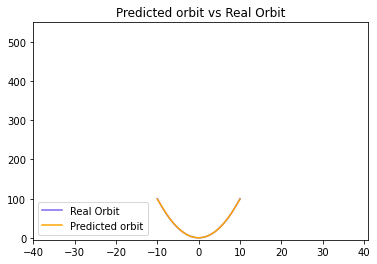

In [5]:
import matplotlib.pyplot as plt
def plot_orbit(model_preds):
  axeslim = int(len(model_preds)/2)
  plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1)**2,color="mediumslateblue")
  plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
  plt.axis([-40, 41, -5, 550])
  plt.legend(["Real Orbit", 'Predicted orbit'],loc="lower left")
  plt.title("Predicted orbit vs Real Orbit")
  plt.show()

plot_orbit(preds20)

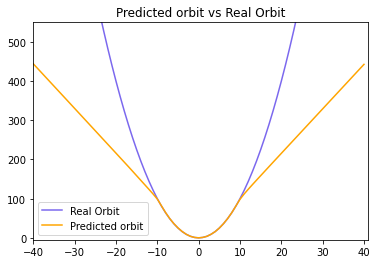

In [6]:
plot_orbit(model4.predict(np.arange(-40,41)))